In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df_len = len(train_df)
test_df_len = len(test_df)

In [4]:
def combine_df(train_df, test_df):
    combined_df = pd.concat([train_df, test_df], ignore_index=True)
    return combined_df

def separate_df(combined_df, train_df_len, test_df_len):
    train_df = combined_df.iloc[:train_df_len]
    test_df = combined_df.iloc[train_df_len:train_df_len + test_df_len]
    return train_df, test_df

full_df = combine_df(train_df, test_df)
len(full_df)

12970

In [5]:
full_df
zero_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
false_columns = ['VIP']

condition = (full_df['CryoSleep'] == True)

# Utiliser fillna avec `infer_objects(copy=False)` pour remplacer les valeurs manquantes
full_df.loc[~condition, zero_columns] = full_df.loc[~condition, zero_columns].fillna(0)
full_df.loc[~condition, false_columns] = full_df.loc[~condition, false_columns].fillna(False)

# Utiliser infer_objects(copy=False) pour convertir les objets
full_df = full_df.infer_objects(copy=False)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [20]:
zero_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
false_columns = ['VIP']
cryosleep_column = ['CryoSleep']

condition_cryo_true = (full_df['CryoSleep'] == True)
condition_zero_columns = (full_df[zero_columns].eq(0).all(axis=1))

full_df.loc[~condition_cryo_true, zero_columns] = full_df.loc[~condition_cryo_true, zero_columns].fillna(0)
full_df.loc[~condition_cryo_true, false_columns] = full_df.loc[~condition_cryo_true, false_columns].fillna(False)
full_df.loc[condition_zero_columns, cryosleep_column] = full_df.loc[condition_zero_columns, cryosleep_column].fillna(True)

full_df = full_df.infer_objects(copy=False)

In [21]:
full_df['CryoSleep'] = full_df['CryoSleep'].fillna(False)

In [22]:
pd.set_option('future.no_silent_downcasting', True)

In [23]:
full_df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep          0
Cabin            299
Destination      274
Age              270
VIP              104
RoomService       93
FoodCourt        109
ShoppingMall     131
Spa              107
VRDeck            91
Name             294
Transported     4277
dtype: int64

In [24]:
full_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


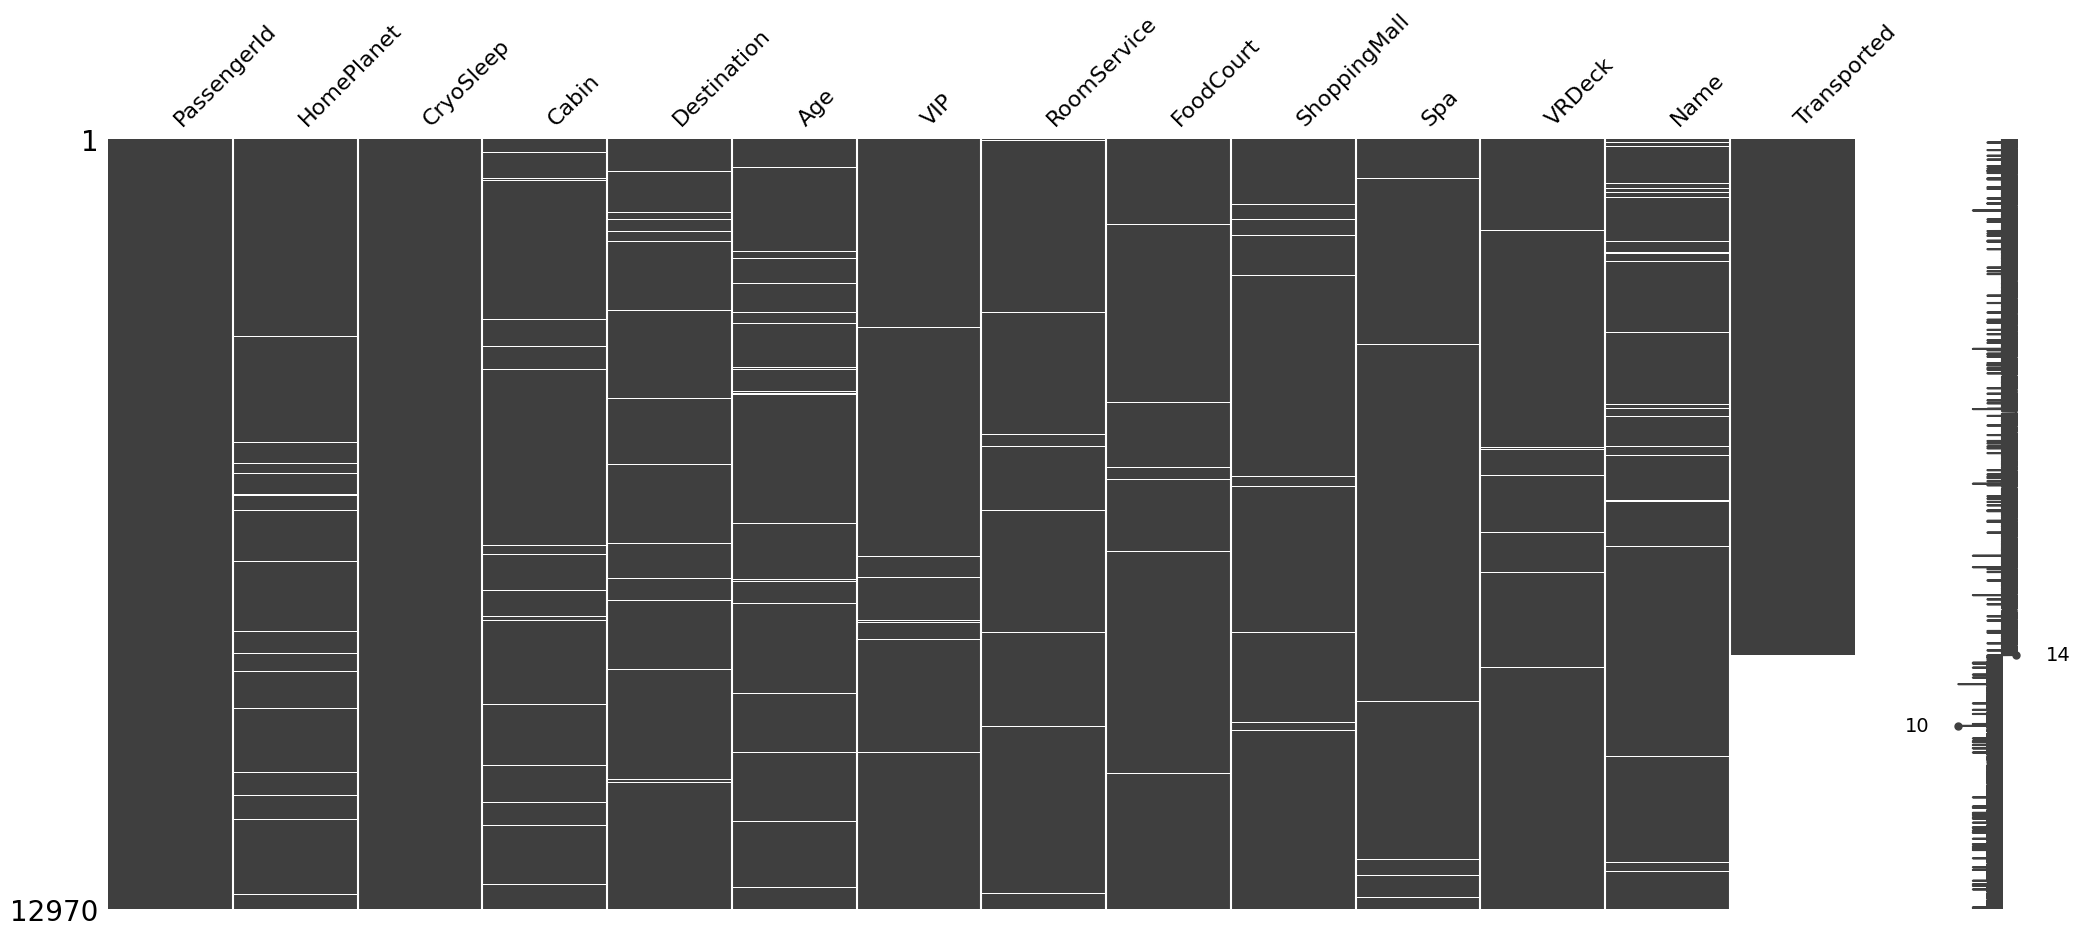

<Figure size 1500x900 with 0 Axes>

In [26]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(full_df)
plt.figure(figsize=(15, 9))
plt.show()

<Axes: >

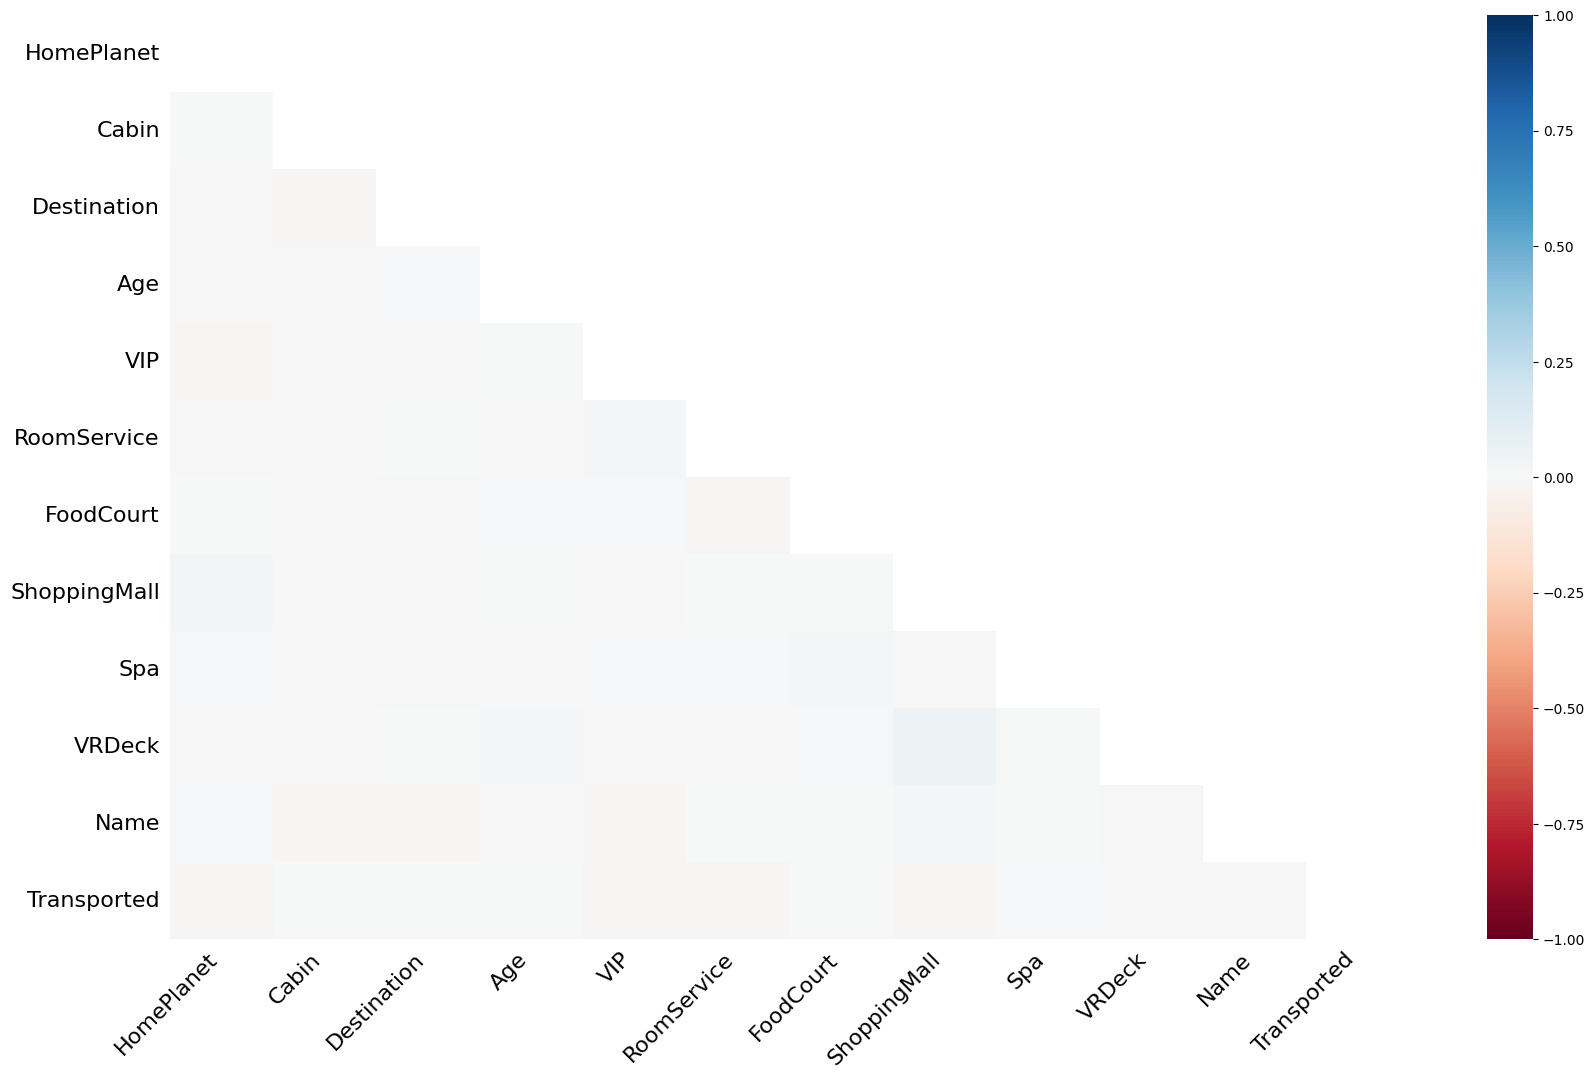

In [27]:
msno.heatmap(full_df, labels=True)

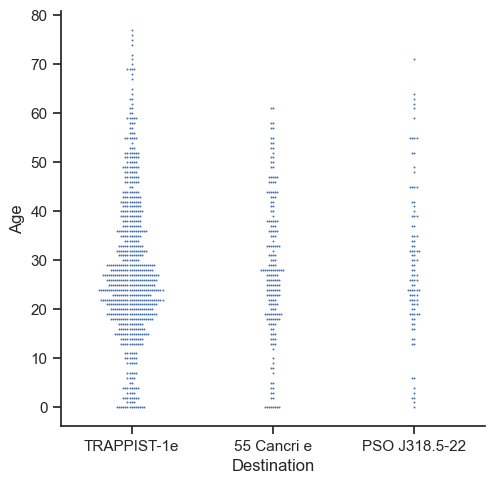

In [28]:
import seaborn as sns
sample_df = full_df.sample(n=1000)

sns.set(style='ticks')
sns.catplot(x='Destination', y='Age', kind='swarm', data=sample_df, s=2)
plt.show()

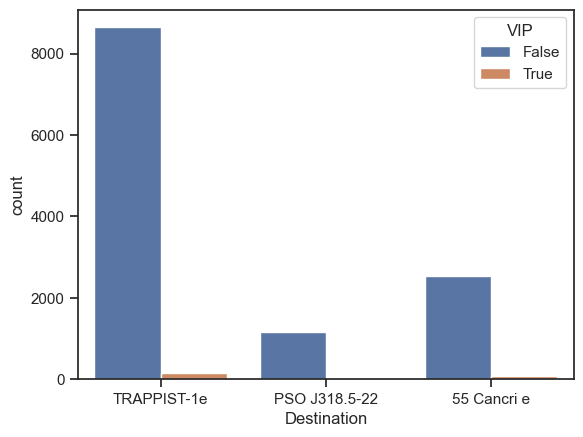

In [30]:
sns.countplot(x='Destination', hue='VIP', data=full_df)
plt.show()

In [31]:
cabin_split = full_df['Cabin'].str.split('/', expand=True)
cabin_split.columns = ['Deck', 'Room_Number', 'Side']
new_df = pd.concat([full_df, cabin_split], axis=1)
full_df = new_df
full_df.drop(columns=['Cabin'], inplace=True)
full_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room_Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [32]:
group_means = full_df.groupby(['HomePlanet', 'CryoSleep'])['Age'].mean()
print(group_means)

HomePlanet  CryoSleep
Earth       False        27.056735
            True         23.575071
Europa      False        35.488731
            True         32.929037
Mars        False        29.800888
            True         28.934426
Name: Age, dtype: float64


In [33]:
group_means = full_df.groupby(['HomePlanet', 'CryoSleep'], group_keys=True)['Age'].mean().reset_index(name='Age_mean')
full_df = full_df.merge(group_means, on=['HomePlanet', 'CryoSleep'], how='left')
full_df['Age'] = full_df['Age'].fillna(full_df['Age_mean'])
full_df.drop(columns=['Age_mean'], inplace=True)

In [34]:
full_df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep          0
Destination      274
Age                5
VIP              104
RoomService       93
FoodCourt        109
ShoppingMall     131
Spa              107
VRDeck            91
Name             294
Transported     4277
Deck             299
Room_Number      299
Side             299
dtype: int64

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numerical_features = ['Room_Number', 'Age', 'RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']
categorical_features = ['HomePlanet','CryoSleep','Destination','VIP','Deck', 'Side']

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [36]:
train_df, test_df = separate_df(full_df,train_df_len,test_df_len)

y = train_df['Transported']

train_df.drop(columns=['Transported'], inplace=True)
test_df.drop(columns=['Transported'], inplace=True)

y = y.astype(bool)
y.head()

/tmp/ipykernel_22279/3959216918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=['Transported'], inplace=True)
/tmp/ipykernel_22279/3959216918.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=['Transported'], inplace=True)


0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [37]:
transformed_data_train = preprocessor.fit_transform(train_df)
transformed_data_test = preprocessor.transform(test_df)

feature_names = preprocessor.named_transformers_['categorical'].named_steps['encoder'].get_feature_names_out(input_features=categorical_features) 

all_feature_names = numerical_features + list(feature_names)

In [38]:
transformed_train_df = pd.DataFrame(transformed_data_train, columns = all_feature_names)
transformed_test_df = pd.DataFrame(transformed_data_test, columns = all_feature_names)

In [39]:
transformed_train_df.head()

,Room_Number,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,-1.186627,0.709082,-0.335878,-0.283399,-0.286874,-0.272740,-0.264958,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.186627,-0.336318,-0.170774,-0.277757,-0.245047,0.215179,-0.226150,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.186627,2.033254,-0.270745,1.958344,-0.286874,5.695155,-0.221740,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.186627,0.290922,-0.335878,0.520895,0.333834,2.685879,-0.094731,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.184651,-0.893864,0.123080,-0.239517,-0.034241,0.229399,-0.263194,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [45]:
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

SEED = 42

In [46]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

gbm_model_1 = GradientBoostingClassifier(n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=5, random_state=SEED, min_samples_split=2, min_samples_leaf=3, loss='exponential', subsample=0.5)

gbm_model_2 = GradientBoostingClassifier(n_estimators=70, learning_rate=0.1, max_features='log2', max_depth=5, random_state=SEED, min_samples_split=2, min_samples_leaf=3, subsample=0.5, loss='log_loss')

gbm_model_3 = GradientBoostingClassifier(n_estimators=70, learning_rate=0.1, max_features='log2', max_depth=5, random_state=SEED, min_samples_split=2, min_samples_leaf=3, subsample=0.5, loss='exponential')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(transformed_train_df, y, test_size=0.2, random_state=SEED)

In [49]:
from sklearn.metrics import accuracy_score

gbm_model_1.fit(X_train, y_train)
gbm_model_2.fit(X_train, y_train)
gbm_model_3.fit(X_train, y_train)

gbm_1_predictions = gbm_model_1.predict(X_test)
gbm_2_predictions = gbm_model_2.predict(X_test)
gbm_3_predictions = gbm_model_3.predict(X_test)


stacked_features = np.column_stack((gbm_1_predictions, gbm_2_predictions, gbm_3_predictions))

meta_model = LogisticRegression()
meta_model.fit(stacked_features, y_test)

gbm_1_base_preds = gbm_model_1.predict(X_test)
gbm_2_base_preds = gbm_model_2.predict(X_test)
gbm_3_base_preds = gbm_model_3.predict(X_test)


stacked_base_preds = np.column_stack((gbm_1_base_preds, gbm_2_base_preds, gbm_3_base_preds))

ensemble_predictions = meta_model.predict(stacked_base_preds)

ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy :", ensemble_accuracy)

Ensemble Accuracy : 0.8056354226566993


In [50]:
gbm_1_base_preds = gbm_model_1.predict(transformed_test_df)
gbm_2_base_preds = gbm_model_2.predict(transformed_test_df)
gbm_3_base_preds = gbm_model_3.predict(transformed_test_df)

stacked_base_preds = np.column_stack((gbm_1_base_preds, gbm_2_base_preds, gbm_3_base_preds))

In [51]:
ensemble_predictions = meta_model.predict(stacked_base_preds)

In [52]:
ensemble_predictions

array([ True, False,  True, ...,  True,  True,  True])

In [53]:
output = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Transported' : ensemble_predictions
})
output.to_csv('predictions.csv', index=False)